# **HANDS ON 2**
Nama : M. Arief Rahman Hakim \
NIM  : 122140083

# **Instruksi Hands On 2** 

## Instruksi 1

1. Kamu adalah seorang intern pada sebuah perusahaan teknologi kesehatan. Perusahaan tersebut sedang mengembangkan teknologi wearable untuk mendeteksi detak jantung berdasarkan sinyal PPG (Photoplethysmography) yakni sinyal aliran darah dari jantung ke tangan. Kamu akan mensimulasikan sinyal PPG menggunakan library `neurokit2.ppg_simulate` (Ref.) dengan parameter sebagai berikut

    Durasi: `Berdasarkan 3 digit terakhir nim anda`\
    Sampling Rate: `150 Hz`\
    Noise Level: `0.<2 digit nim terakhir>`\
    Heart Rate: `80 Beat Per Minute (BPM)`\
    Random State: `tanggal bulan tahun lahir anda` dengan format YYMMDD misalnya `240925`

    Karena NIM saya 122140083, maka:\
    Durasi: `83`\
    Sampling rate : `150`\
    Noise Level : `0.83`\
    Heart Rate : `88 BPM`\
    Random State : `160823`

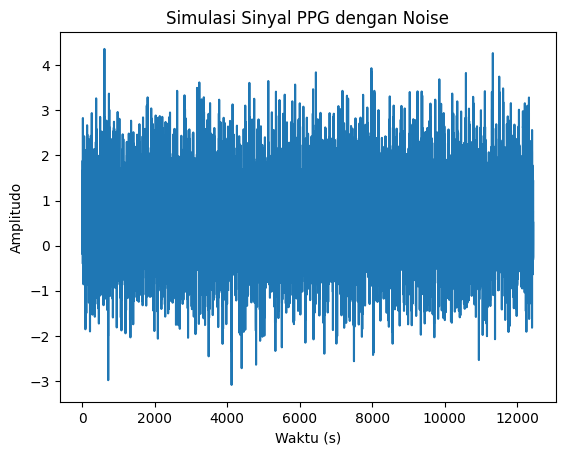

In [4]:
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt

# Simulasi sinyal PPG
ppg_signal = nk.ppg_simulate(duration=83, sampling_rate=150, heart_rate=80, random_state=160823)

# Tambahkan noise secara manual
noise_level = 0.83
noise = np.random.normal(0, noise_level, len(ppg_signal))
ppg_signal_noisy = ppg_signal + noise

# Plot sinyal dengan noise
plt.plot(ppg_signal_noisy)
plt.title("Simulasi Sinyal PPG dengan Noise")
plt.xlabel("Waktu (s)")
plt.ylabel("Amplitudo")
plt.show()

- 1(a) Buktikanlah bahwa proses downsampling pada sinyal PPG akan menghilangkan informasi dari sinyal asi. Lakukan downsampling dari 150Hz ke 100Hz, 50Hz, 25Hz, 10Hz, hingga 5Hz. Jelaskan apa yang terjadi dan buktikan bahwa semakin rendah sampling frequency (fs) maka sinyal akan semakin terdistorsi dan terdapat Aliasing pada sinyal hasil downsampling. Jelaskan apa itu Aliasing

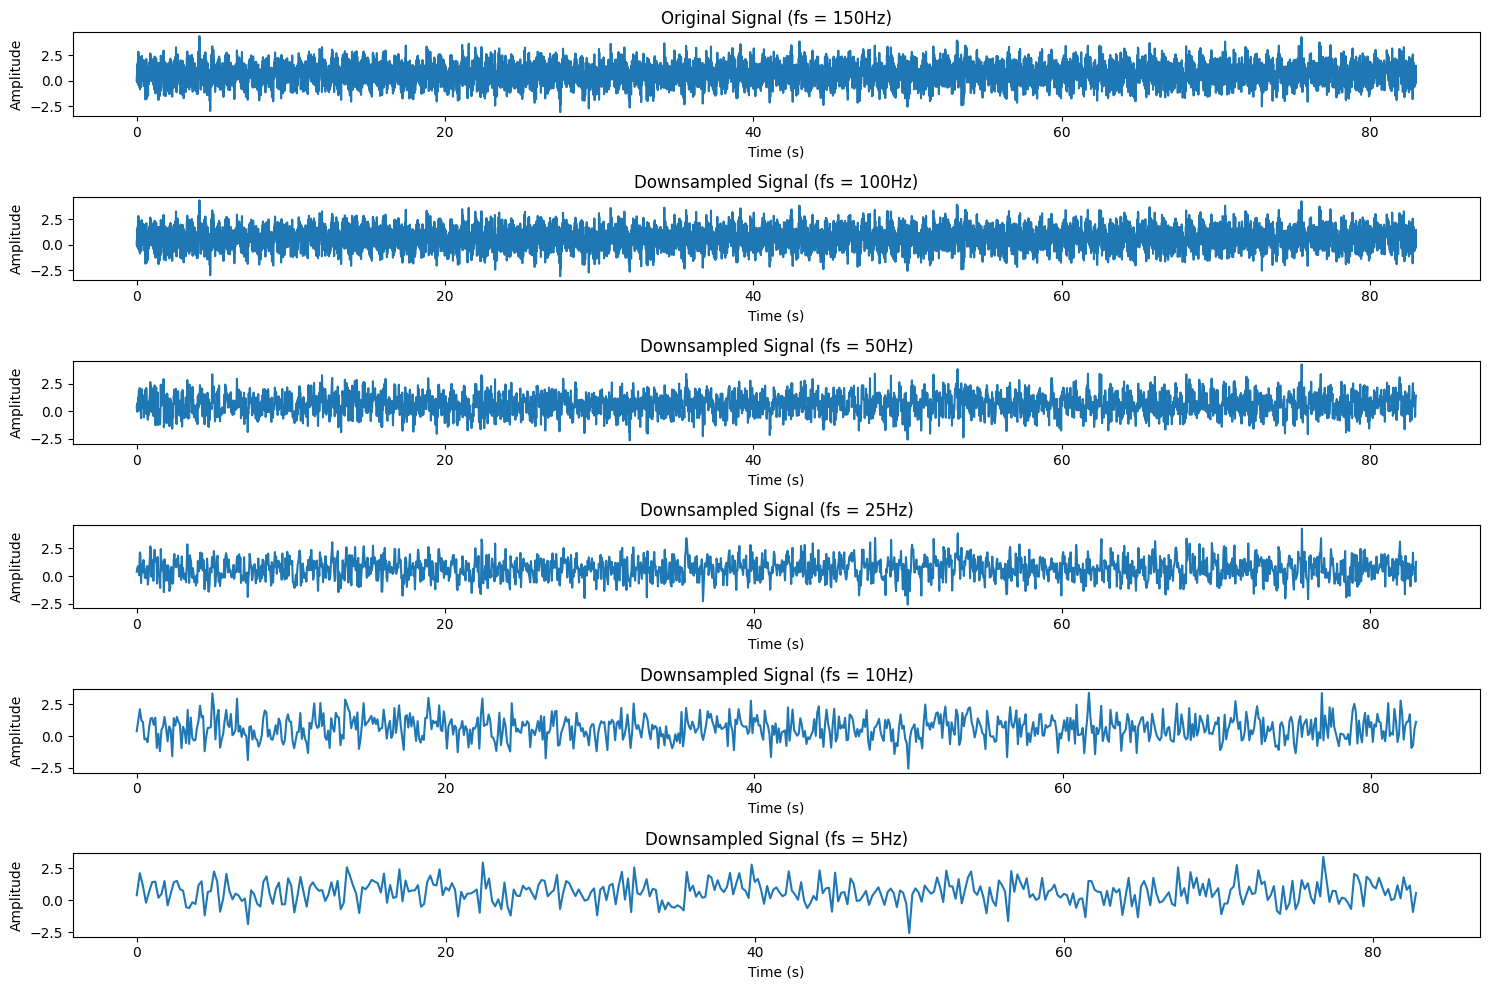

In [6]:
# Define the original sampling rate and time vector
original_fs = 150  # Original sampling frequency
time = np.arange(len(ppg_signal_noisy)) / original_fs

# Define target frequencies for downsampling
target_fs = [100, 50, 25, 10, 5]

# Create subplots
plt.figure(figsize=(15, 10))

# Plot original signal
plt.subplot(6, 1, 1)
plt.plot(time, ppg_signal_noisy)
plt.title(f'Original Signal (fs = {original_fs}Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Perform downsampling for each target frequency
for i, fs in enumerate(target_fs, 1):
    # Calculate downsampling factor
    factor = original_fs // fs
    
    # Downsample signal
    downsampled_signal = ppg_signal_noisy[::factor]
    downsampled_time = time[::factor]
    
    # Plot downsampled signal
    plt.subplot(6, 1, i+1)
    plt.plot(downsampled_time, downsampled_signal)
    plt.title(f'Downsampled Signal (fs = {fs}Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

### Penjelasan Instruksi 1 : a
Pada kesempatan kali ini kita telah mensimulasikan downsamping yang dilakukan mulai dari 150hz sampai 5hz, Berikut adalah hasilnya:
| Sampling Rate | Hasil yang Terlihat           | Penjelasan                                                                 |
|---------------|-------------------------------|---------------------------------------------------------------------------|
| 150 Hz        | Sinyal sangat halus dan detail| Representasi sinyal paling akurat                                         |
| 100 Hz        | Masih cukup baik              | Hampir tidak ada informasi yang hilang                                   |
| 50 Hz         | Mulai terlihat kurang detail  | Beberapa puncak halus terlewatkan                                        |
| 25 Hz         | Distorsi tampak jelas         | Bentuk sinyal berubah, detak jantung sulit dibedakan                     |
| 10 Hz         | Sangat terdistorsi            | Informasi detak jantung hampir hilang, aliasing muncul                   |
| 5 Hz          | Tidak akurat                  | Sinyal berubah menjadi gelombang aneh → terjadi aliasing yang berat     |

Berdasarkan yang kita lihat dari hasil simulasi, semakin tinggi `sampling rate` maka semakin banyak informasi penting yang hilang karena sinyal akan semakin terdistorsi dan terdapat `Aliasing` pada sinyal hasil downsampling. 

Aliasing adalah suatu kejadian saat sinyal dengan frekuensi yang tinggi di-sampling dengan sampling rate yang terlalu rendah, sehingga sinyal tersebut tidak mampu mempresentasikan nilai/informasinya dengan baik.

Menurut Teorema Nyquist-Shannon:
- Agar sinyal bisa di-sampling dengan baik, maka `sampling rate ≥ 2 × frekuensi tertinggi sinyal`.
- Jika tidak memenuhi syarat tersebut. Maka akan terjadi Aliasing.
- Contoh: `fs` 5 hz akan terdistrosi karena tidak memenuhi `≥ 2 × frekuensi tertinggi sinyal`.

Berikut saya tambahkan referensi untuk melihatnya dalam keadaan bergerak, bagaimana sampling rate yang rendah menjadikan sinyal semakin tidak akurat:
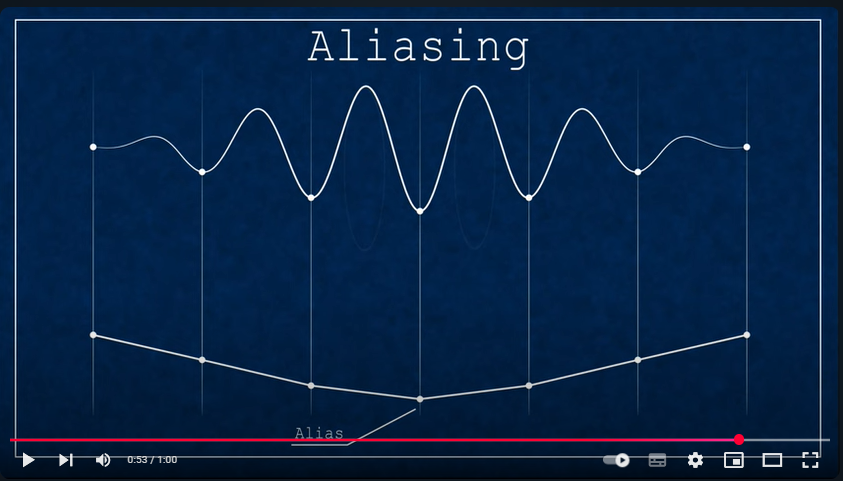\
sumber: https://www.youtube.com/watch?v=CTllCx5pHvM 

- 1(b) Ketika kamu melakukan filtering, terdapat parameter order saat kamu melakukan filtering. Apa maksudnya dari order dan apa yang akan terjadi jika kamu mengganti nilai order terhadap sinyal?

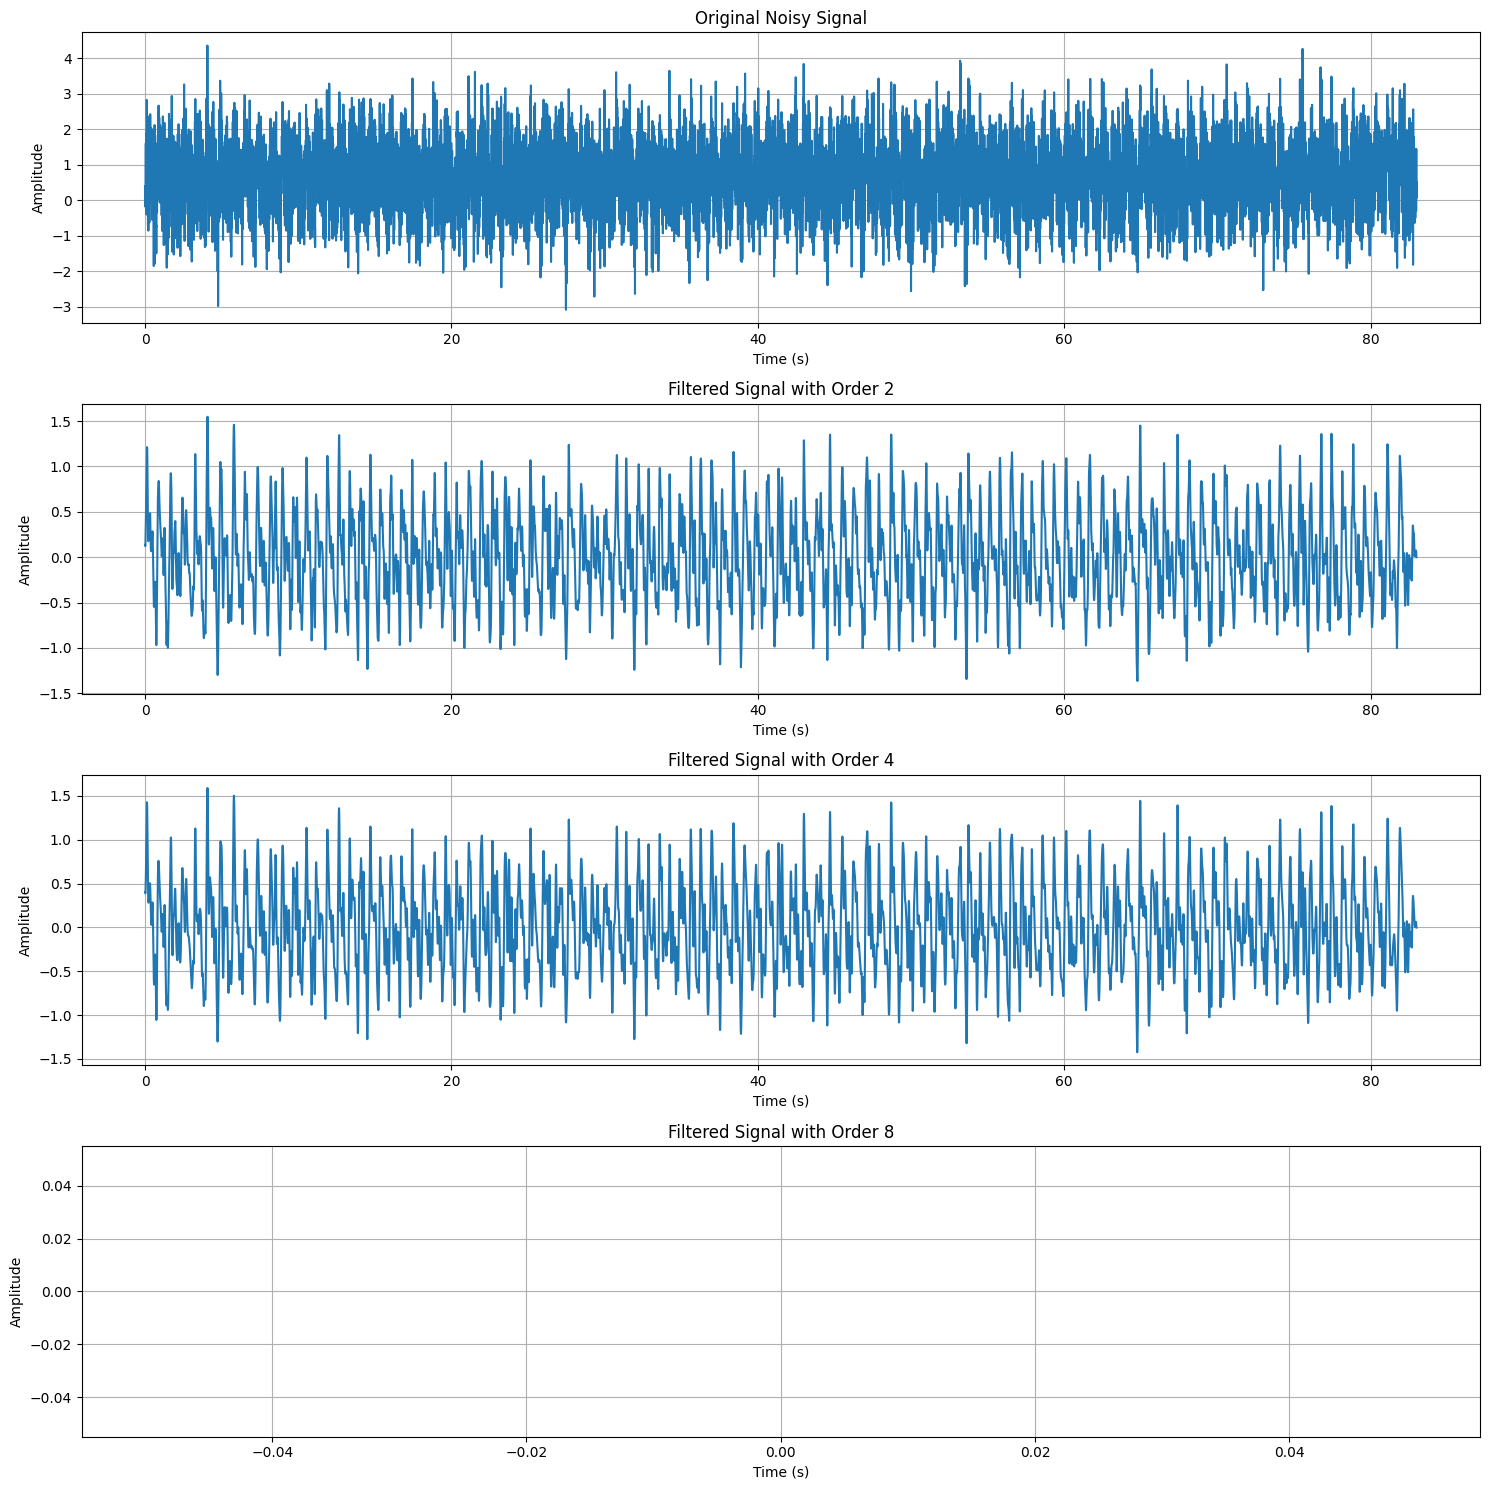

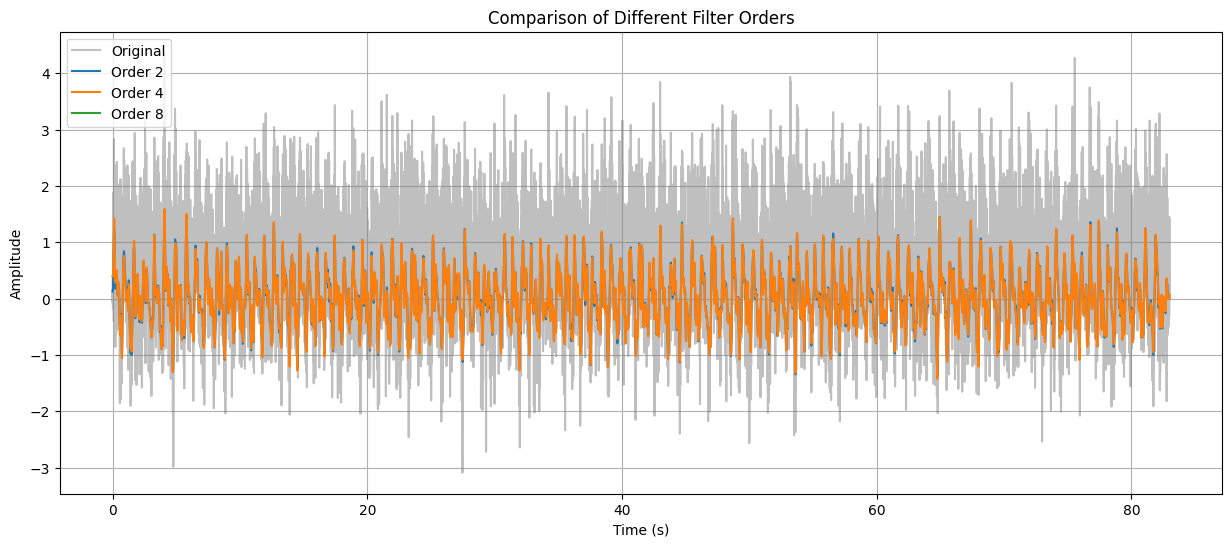

In [17]:
from scipy import signal

# Define filter parameters
low_freq = 0.5  # Hz
high_freq = 8.0  # Hz
orders = [2, 4, 8]  # Different filter orders to compare

# Create subplots for individual signals
plt.figure(figsize=(15, 15))

# Plot original noisy signal
plt.subplot(4, 1, 1)
plt.plot(time, ppg_signal_noisy)
plt.title('Original Noisy Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Apply filters and plot for each order
for i, order in enumerate(orders, 1):
    # Create Butterworth bandpass filter
    nyquist = original_fs / 2
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    
    # Apply filter
    filtered_signal = signal.filtfilt(b, a, ppg_signal_noisy)
    
    # Plot filtered signal
    plt.subplot(4, 1, i+1)
    plt.plot(time, filtered_signal)
    plt.title(f'Filtered Signal with Order {order}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Plot all signals overlaid
plt.figure(figsize=(15, 6))
plt.plot(time, ppg_signal_noisy, 'gray', alpha=0.5, label='Original')

for order in orders:
    nyquist = original_fs / 2
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = signal.butter(order, [low, high], btype='band')
    filtered_signal = signal.filtfilt(b, a, ppg_signal_noisy)
    plt.plot(time, filtered_signal, label=f'Order {order}')

plt.title('Comparison of Different Filter Orders')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


### Penjelasan Instruksi 1 : b

Pada kesempatan ini kita akan melakukan filtering, namun kita akan fokus terhadap salah satu parameter dalam filtering yaitu `order`, Apa itu `Order`?

Parameter `order` dalam filtering tertuju pada tingkat kompleksitas dari sebuah filter, secara sederhana:
`Semakin tinggi order, maka semakin tajam transisinya`
Berikut lebih jelasnya Pengaruh order terhadap sinyal:
| Order Rendah                                       | Order Tinggi                                                      |
|----------------------------------------------------|--------------------------------------------------------------------|
| Transisi antara passband dan stopband lebih landai | Transisi lebih tajam                                              |
| Sedikit distorsi fase                              | Potensi distorsi fase tinggi (non-linear phase)                   |
| Tidak terlalu ‘bersih’ membuang noise tinggi       | Sangat bersih, tapi bisa overfitting noise                        |

Pada Simulasi yang kita coba diatas, bisa dilihat bahwa:
- Order 2 : Noise mengurang sedikit, sinyal tetap halus
- Order 4 : Noise mengurang sedikit dibandingkan order 2
- Order 8 : Nilai Terdistorsi karena order terlalu besar

Namun jika order lebih tinggi, bisa muncul ringing atau distorsi tepi sinyal.

Kesimpulan:
- Order membuat filter lembut dan stabil tapi kurang efektif membuang noise
- Order tinggi menghasilkan filter tajam, efektif menolak noise, tapi bisa menyebabkan distorsi bentuk sinyal (seperti overshoot, ringing, atau delay fase).



## Instruksi 2

2. Lakukan eksperimen dengan merancang filter band-pass menggunakan signal.butter. Pada sinyal respirasi (pernapasan). Generate sebuah signal dengan ketentuan:

    Durasi: `Berdasarkan 3 digit terakhir nim anda`\
    Sampling Rate: `100 Hz`\
    Noise level: `0.<2 digit nim terakhir>`\
    respiratory_rate: `18 Breaths Per Minute (BPM)`\
    random_state: `tanggal bulan tahun lahir anda` dengan format YYMMDD misalnya `240925`\
Anda dapat dengan bebas bereksperimen menentukan frekuensi cutoff yang diinginkan namun jelaskan latar belakang penentuan letak frekuensi cutoff mengapa anda memilih di nilai tersebut.

    Karena NIM saya 122140083, maka:\
    Durasi: `83`\
    Sampling rate : `150`\
    Noise Level : `0.83`\
    Heart Rate : `88 BPM`\
    Random State : `160823`

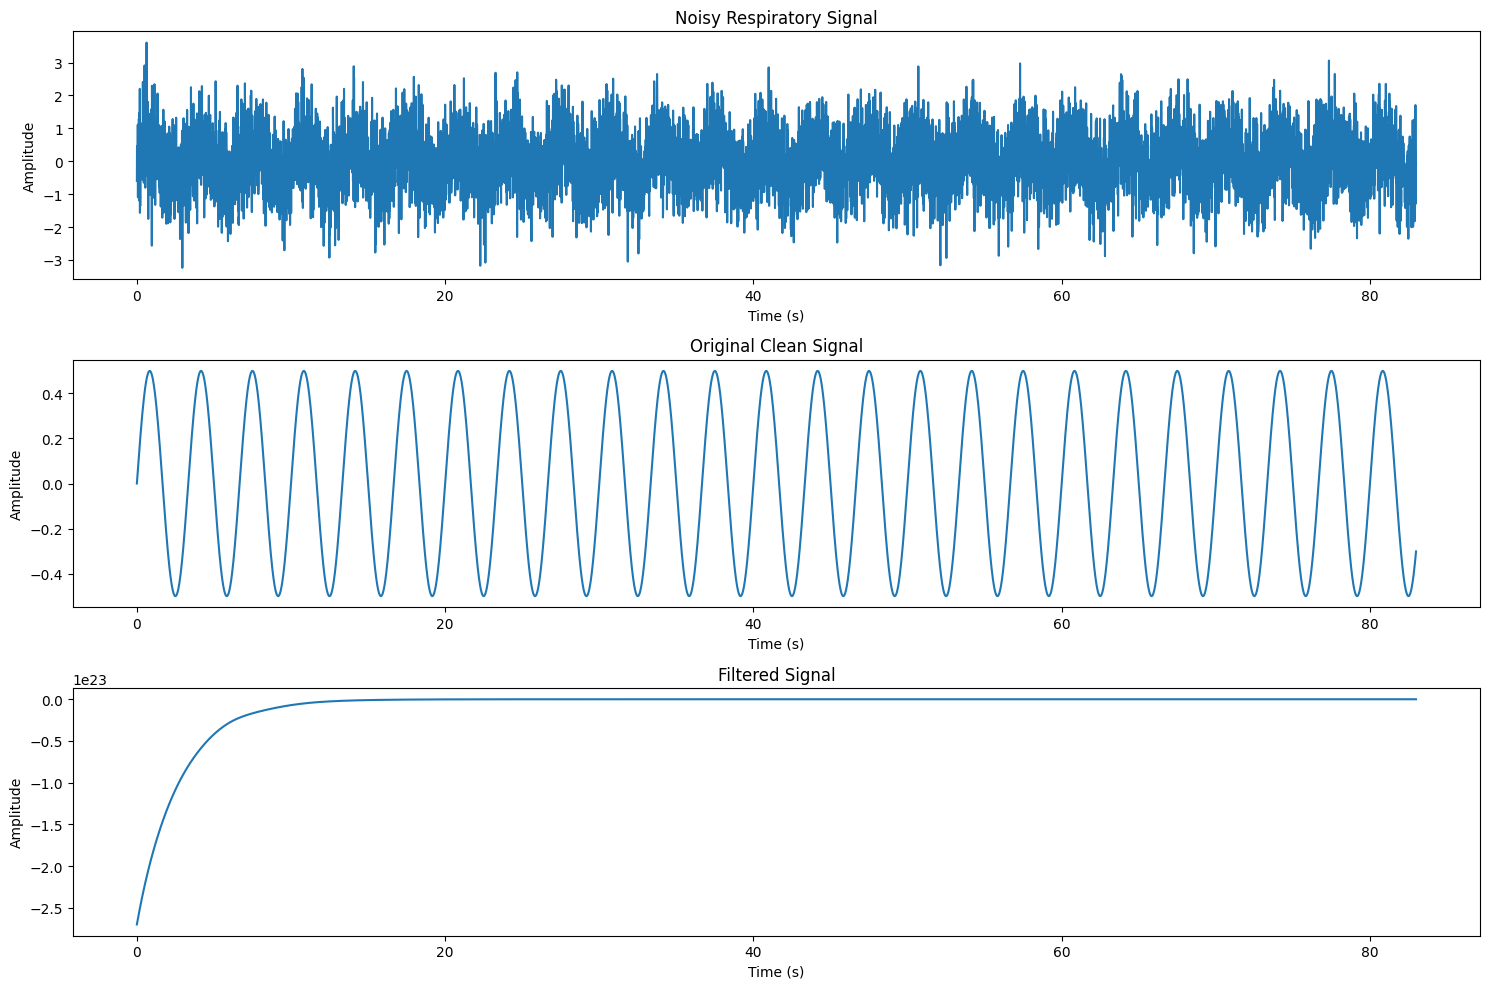

In [20]:
import numpy as np
from scipy import signal
import neurokit2 as nk

# Generate respiratory signal
import matplotlib.pyplot as plt

# Generate respiratory signal using nk.signal_simulate
resp_signal = nk.signal_simulate(
    duration=83,
    sampling_rate=100,
    frequency=18/60,  # Convert BPM to Hz
    random_state=160823
)

# Add noise
noise_level = 0.83
noise = np.random.normal(0, noise_level, len(resp_signal))
resp_signal_noisy = resp_signal + noise

# Design bandpass filter
low_freq = 0.1  # Hz (typical lower bound for respiratory rate)
high_freq = 0.5  # Hz (typical upper bound for respiratory rate)
order = 4  # moderate order to avoid distortion

# Create Butterworth bandpass filter
nyquist = sampling_rate / 2
low = low_freq / nyquist
high = high_freq / nyquist
b, a = signal.butter(order, [low, high], btype='band')

# Apply filter
filtered_signal = signal.filtfilt(b, a, resp_signal_noisy)

# Plot results
plt.figure(figsize=(15, 10))

# Original noisy signal
plt.subplot(3, 1, 1)
plt.plot(np.arange(len(resp_signal_noisy))/sampling_rate, resp_signal_noisy)
plt.title('Noisy Respiratory Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Clean signal
plt.subplot(3, 1, 2)
plt.plot(np.arange(len(resp_signal))/sampling_rate, resp_signal)
plt.title('Original Clean Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Filtered signal
plt.subplot(3, 1, 3)
plt.plot(np.arange(len(filtered_signal))/sampling_rate, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()